# Comparison of Classification Methods Assignment (Part 2)

#### Course: 514A - Data Mining
#### Instructor: Weixiong Zhang
#### Author: Nurzhan Kanatzhanov
#### Date: April 28, 2021

In [1]:
import random
import pandas as pd
import math
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# url and the header names for all eleven columns of the breast cancer data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", 
         "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

# reading the data and making all missing values indicated as '?' as NaN/None
df = pd.read_csv(url, delimiter=",", names=names, na_values=['?'])
df = df.drop('Sample code number', 1)
# sample data excerpt
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


### The candidate methods to be analyzed and compared:
##### 1. k-nearest-neighbors,
##### 2. decision tree,
##### 3. random forest, 
##### 4. polynomial kernel SVM of your choice,
##### 5. Gaussian kernel SVM),
##### 6. deep neural network with Sigmoid activation functions,
##### 7. deep neural network with ReLu activation.

In [2]:
# there are 16 instances of missing values -> let's fix them
df.isin([np.nan]).sum(axis=0)

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [3]:
# quickly fix the NaN values to be randomly chosen depending on the range of values in the column (Bare Nuclei)
df['Bare Nuclei'] = df['Bare Nuclei'].apply(lambda x: np.random.choice(df['Bare Nuclei'].dropna().values) if np.isnan(x) else x)

# check if any NaN values are left 
df['Bare Nuclei'].isin([np.nan]).sum(axis=0)

0

In [4]:
df.shape

(699, 10)

In [5]:
# dividing dataset into inputs (X) and target (y)
X = df.drop(columns=['Class'])
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [6]:
# separate target (y) values
y = df['Class'].values
y[-5:]

array([2, 2, 4, 4, 4])

### First (1st): K-NN classification method

In [7]:
# Let's see how many samples of each breast cancer type we have in our set
samples = pd.DataFrame(df.groupby("Class").size().reset_index()).rename(columns={0:"samples"})
print("There are", samples['samples'][0], "benign samples and ", samples['samples'][1], "malignant samples in the dataset")

There are 458 benign samples and  241 malignant samples in the dataset


In [8]:
# create K-NN Classifier model and do 10-cross validation

import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# two neighbors since only 2 classes exist for the dataset
knn = KNeighborsClassifier()

# train model with cross-validation of 10
# cross_val_score function splits our data into 5 groups and fits and scores our data 5 seperate times, 
# recording the accuracy score in an array each time
cv_scores = cross_val_score(knn, X, y, cv=10)

#print each cv score (accuracy) and average them
print(cv_scores)
print('Cross validation scores mean: {}'.format(np.mean(cv_scores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.88571429 0.98571429 0.97142857 0.91428571 1.         0.97142857
 0.97142857 1.         0.98571429 0.97101449]
Cross validation scores mean: 0.965672877846791
Time elapsed:  0.17720985412597656


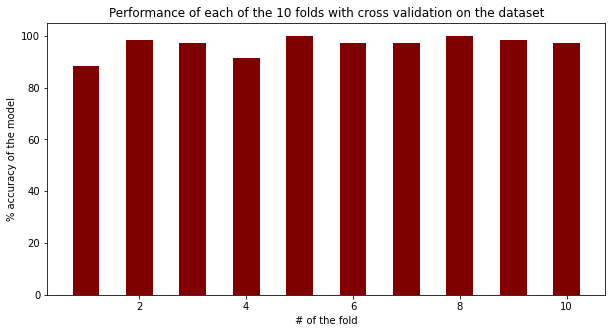

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
folds = range(1, 11)
scores = np.array(cv_scores)
percentages = scores * 100
bars = plt.bar(folds, percentages, color='maroon', width=0.5)
plt.xlabel("# of the fold")
plt.ylabel("% accuracy of the model")
plt.title("Performance of each of the 10 folds with cross validation on the dataset")
plt.show()

In [10]:
# getting all of the important metrics (performance) by averaging out 10 matrices
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, SCORERS
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_binary = np.array([number[0] for number in lb.fit_transform(y)])

recall = cross_val_score(knn, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(knn, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(knn, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(knn, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9543333333333335
Precision: 0.9489552114552116
F1: 0.9503872654590906
Accuracy: 0.965672877846791


In [11]:
manhattan_knn = KNeighborsClassifier(p=1)
manhattan = cross_val_score(manhattan_knn, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy for Manhattan distance:', np.mean(manhattan))

minkowski_knn = KNeighborsClassifier(p=3)
minkowski = cross_val_score(minkowski_knn, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy for Minkowski distance:', np.mean(minkowski))

Accuracy for Manhattan distance: 0.9642857142857142
Accuracy for Minkowski distance: 0.962815734989648


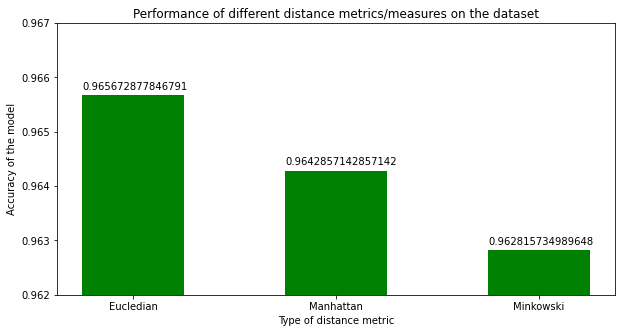

In [12]:
distance_measures = np.array([np.mean(accuracy), np.mean(manhattan), np.mean(minkowski)])
fig = plt.figure(figsize = (10, 5))
bar_measures = ["Eucledian", "Manhattan", "Minkowski"]
bars3 = plt.bar(bar_measures, distance_measures, color='green', width=0.5)
plt.xlabel("Type of distance metric")
plt.ylabel("Accuracy of the model")
plt.title("Performance of different distance metrics/measures on the dataset")
plt.ylim(ymin=0.962)
plt.ylim(ymax=0.967)
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.0001, yval)
plt.show()

### Second (2nd): Decision Tree classification method

In [13]:
start = time.time()
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y, cv=10)

#print each cv score (accuracy) and average them
print(dt_scores)
print('Cross validation scores mean for decision tree classifier: {}'.format(np.mean(dt_scores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.87142857 0.92857143 0.94285714 0.88571429 0.92857143 0.92857143
 0.98571429 0.97142857 0.98571429 0.97101449]
Cross validation scores mean for decision tree classifier: 0.9399585921325052
Time elapsed:  0.0700840950012207


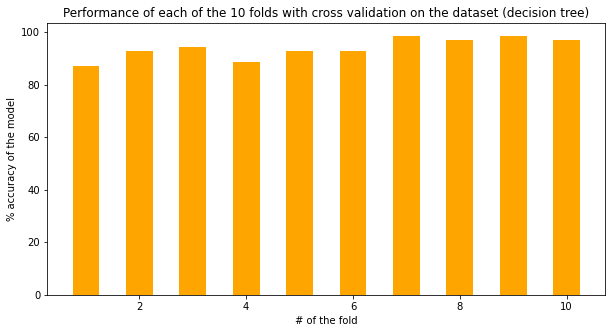

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
folds = range(1, 11)
scores = np.array(dt_scores)
percentages = scores * 100
bars = plt.bar(folds, percentages, color='orange', width=0.5)
plt.xlabel("# of the fold")
plt.ylabel("% accuracy of the model")
plt.title("Performance of each of the 10 folds with cross validation on the dataset (decision tree)")
plt.show()

In [15]:
recall = cross_val_score(dt, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(dt, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(dt, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(dt, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9168333333333332
Precision: 0.9168874643874645
F1: 0.9171277869638421
Accuracy: 0.9471014492753623


In [16]:
# entropy information gain
dt2 = DecisionTreeClassifier(criterion="entropy")
accuracy2 = cross_val_score(dt2, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy2))

Accuracy: 0.9270186335403727


In [22]:
sum = 0
for i in range(1000):
    dt2 = DecisionTreeClassifier(criterion="entropy")
    accuracy2 = cross_val_score(dt2, X, y_binary, cv=10, scoring='accuracy')
    sum += np.mean(accuracy2)
    
print('Average Entropy Accuracy:', sum / 1000)

Average Entropy Accuracy: 0.9350571842650119


In [23]:
sum = 0
for i in range(1000):
    dt2 = DecisionTreeClassifier(criterion="gini")
    accuracy2 = cross_val_score(dt2, X, y_binary, cv=10, scoring='accuracy')
    sum += np.mean(accuracy2)
    
print('Average Gini Accuracy:', sum / 1000)

Average Gini Accuracy: 0.9387469151138721


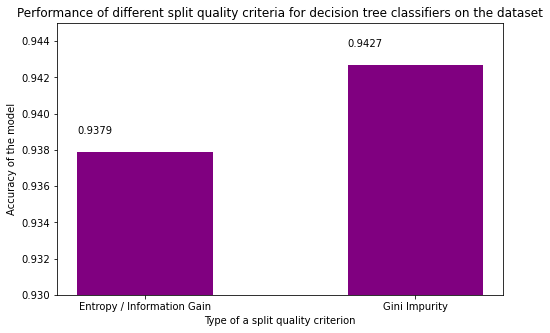

In [17]:
decision_trees = np.array([0.9379, 0.9427])
fig = plt.figure(figsize = (8, 5))
dt_measures = ["Entropy / Information Gain", "Gini Impurity"]
bars4 = plt.bar(dt_measures, decision_trees, color='purple', width=0.5)
plt.xlabel("Type of a split quality criterion")
plt.ylabel("Accuracy of the model")
plt.title("Performance of different split quality criteria for decision tree classifiers on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.945)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

### Third (3rd): Random Forest classification method

In [18]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier

# by default: 100 trees in the forest, gini impurity criterion, bootstrapping = True, 
# OOB samples = False, random_state = None
forest = RandomForestClassifier()
forest_scores = cross_val_score(forest, X, y, cv=10)

#print each cv score (accuracy) and average them
print(forest_scores)
print('Cross validation scores mean for random forest classifier: {}'.format(np.mean(forest_scores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.9        0.98571429 0.97142857 0.91428571 0.98571429 0.98571429
 0.95714286 0.98571429 0.98571429 1.        ]
Cross validation scores mean for random forest classifier: 0.9671428571428571
Time elapsed:  1.3545379638671875


In [19]:
recall = cross_val_score(forest, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(forest, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(forest, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(forest, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9460000000000001
Precision: 0.9534070711896799
F1: 0.9486221607122889
Accuracy: 0.9628364389233954


In [27]:
forest200 = RandomForestClassifier(n_estimators=5000)
forest200_scores = cross_val_score(forest200, X, y, cv=10)
print('Cross validation scores mean for random forest classifier: {}'.format(np.mean(forest200_scores)))

Cross validation scores mean for random forest classifier: 0.9671221532091099


In [28]:
num_trees = []
forest_builder = []

num_trees.append(1)
newForest = RandomForestClassifier(n_estimators=1)
newForest_score = cross_val_score(newForest, X, y, cv=10)
forest_builder.append(np.mean(newForest_score))

# increments of 10 trees
for i in range(10, 110, 10):
    num_trees.append(i)
    newForest = RandomForestClassifier(n_estimators=i)
    newForest_score = cross_val_score(newForest, X, y, cv=10)
    forest_builder.append(np.mean(newForest_score))
    
# after that, increments of 100
for i in range(100, 1100, 100):
    num_trees.append(i)
    newForest = RandomForestClassifier(n_estimators=i)
    newForest_score = cross_val_score(newForest, X, y, cv=10)
    forest_builder.append(np.mean(newForest_score))

In [20]:
plt.figure(figsize = (10, 5))
plt.plot(num_trees, forest_builder)
plt.xlabel("Number of trees in a random forest")
plt.ylabel("Accuracy of the model")
plt.title("Performance of a random forest with a set amount of estimators (trees) on the dataset")
plt.show()

NameError: name 'num_trees' is not defined

<Figure size 720x360 with 0 Axes>

In [29]:
sumForest = 0
for i in range(100):
    newForest = RandomForestClassifier(criterion="gini")
    newForest_score = cross_val_score(newForest, X, y, cv=10)
    sumForest += np.mean(newForest_score)
    
print("Average gini criterion accuracy:", sumForest / 100)

sumForest2 = 0
for i in range(100):
    newForest2 = RandomForestClassifier(criterion="entropy")
    forestscore = cross_val_score(newForest2, X, y, cv=10)
    sumForest2 += np.mean(forestscore)
    
print("Average entropy criterion accuracy:", sumForest2 / 100)

Average gini criterion accuracy: 0.9652805383022769
Average entropy criterion accuracy: 0.9644527950310561


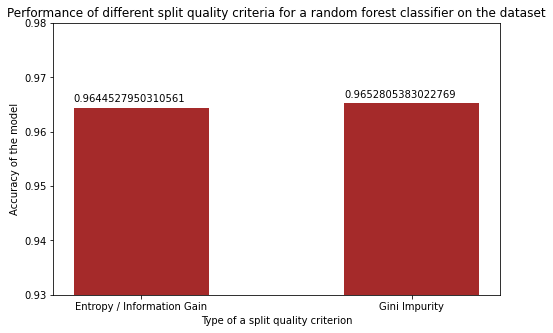

In [34]:
decision_trees = np.array([sumForest2/100, sumForest/100])
fig = plt.figure(figsize = (8, 5))
dt_measures = ["Entropy / Information Gain", "Gini Impurity"]
bars4 = plt.bar(dt_measures, decision_trees, color='brown', width=0.5)
plt.xlabel("Type of a split quality criterion")
plt.ylabel("Accuracy of the model")
plt.title("Performance of different split quality criteria for a random forest classifier on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.98)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [35]:
# now tweaking bootstrapping parameter
sumForest = 0
for i in range(50):
    newForest = RandomForestClassifier(bootstrap=True)
    newForest_score = cross_val_score(newForest, X, y, cv=10)
    sumForest += np.mean(newForest_score)
    
print("Average accuracy of random forest with bootstrapping technique:", sumForest / 50)

sumForest2 = 0
for i in range(50):
    newForest2 = RandomForestClassifier(bootstrap=False)
    forestscore = cross_val_score(newForest2, X, y, cv=10)
    sumForest2 += np.mean(forestscore)
    
print("Average accuracy of random forest with no bootstrapping:", sumForest2 / 50)

Average accuracy of random forest with bootstrapping technique: 0.9653652173913043
Average accuracy of random forest with no bootstrapping: 0.9624534161490683


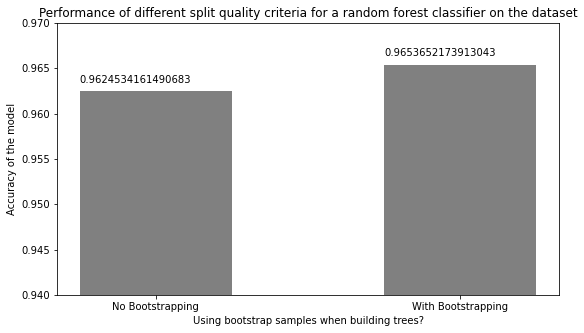

In [38]:
decision_trees = np.array([sumForest2/50, sumForest/50])
fig = plt.figure(figsize = (9, 5))
dt_measures = ["No Bootstrapping", "With Bootstrapping"]
bars4 = plt.bar(dt_measures, decision_trees, color='grey', width=0.5)
plt.xlabel("Using bootstrap samples when building trees?")
plt.ylabel("Accuracy of the model")
plt.title("Performance of different split quality criteria for a random forest classifier on the dataset")
plt.ylim(ymin=0.94)
plt.ylim(ymax=0.97)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

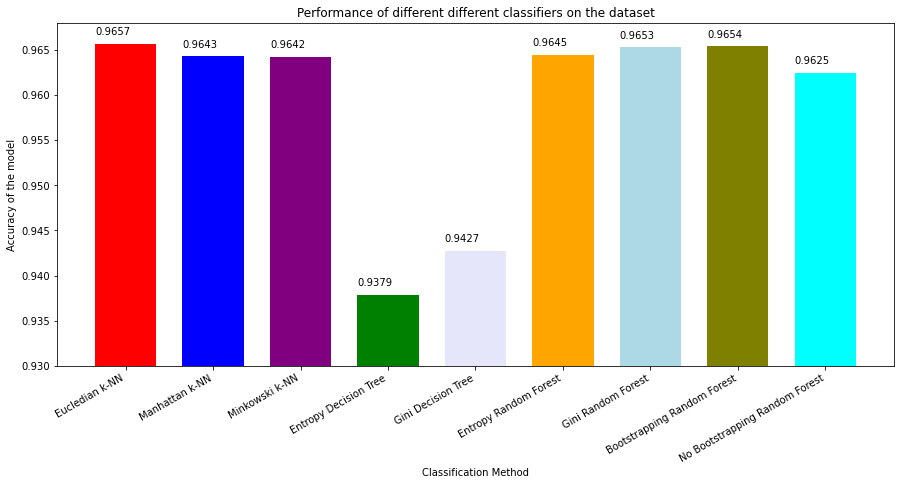

In [48]:
# combining all so far
allSoFar = np.array([0.9657, 0.9643, 0.9642, 0.9379, 0.9427, 0.9645, 0.9653, 0.9654, 0.9625])
fig = plt.figure(figsize = (15, 7))
measures = ["Eucledian k-NN", "Manhattan k-NN", "Minkowski k-NN", "Entropy Decision Tree", "Gini Decision Tree", \
               "Entropy Random Forest", "Gini Random Forest", "Bootstrapping Random Forest", \
               "No Bootstrapping Random Forest" ]
bars4 = plt.bar(measures, allSoFar, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan"], width=0.7)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy of the model")
plt.title("Performance of different different classifiers on the dataset")
fig.autofmt_xdate()
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.968)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

### Fourth (4th): Polynomial Kernel SVM classification method

In [74]:
start = time.time()
from sklearn.svm import SVC
polySVM = SVC(kernel='poly', degree=5)
SVMscores = cross_val_score(polySVM, X, y, cv=10)
#print each cv score (accuracy) and average them
print(SVMscores)
print('Cross validation scores mean for polynomial kernel SVM classifier: {}'.format(np.mean(SVMscores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.87142857 0.95714286 0.92857143 0.91428571 1.         0.95714286
 0.94285714 0.98571429 0.97142857 0.91304348]
Cross validation scores mean for polynomial kernel SVM classifier: 0.9441614906832297
Time elapsed:  0.13155293464660645


In [67]:
poly_degrees = []
poly_scores = []
for i in range(1, 11):
    polySVM = SVC(kernel='poly', degree=i)
    SVMscores = cross_val_score(polySVM, X, y, cv=10)
    poly_degrees.append(i)
    poly_scores.append(round(np.mean(SVMscores), 4))

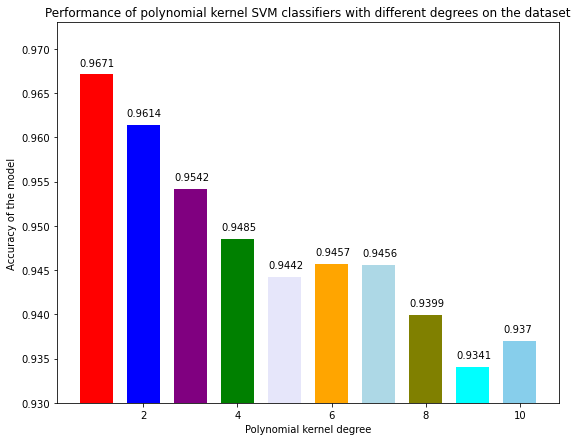

In [73]:
# all different degrees
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(poly_degrees, poly_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=0.7)
plt.xlabel("Polynomial kernel degree")
plt.ylabel("Accuracy of the model")
plt.title("Performance of polynomial kernel SVM classifiers with different degrees on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.973)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [95]:
# checking linear kernel vs poly w/ degree=1 just to make sure
start = time.time()
from sklearn.svm import SVC
#polySVM = SVC(kernel='linear')
#SVMscores = cross_val_score(polySVM, X, y, cv=10)
polySVM2 = SVC(kernel='poly', degree=1)
SVMscores2 = cross_val_score(polySVM2, X, y, cv=10)


#print('Cross validation scores mean for linear kernel SVM classifier: {}'.format(np.mean(SVMscores)))
print('Cross validation scores mean for poly kernel SVM w/ degree=1 classifier: {}'.format(np.mean(SVMscores2)))

end = time.time()
print('Time elapsed: ', end - start)

Cross validation scores mean for poly kernel SVM w/ degree=1 classifier: 0.9671221532091098
Time elapsed:  0.06444478034973145


In [90]:
recall = cross_val_score(polySVM2, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(polySVM2, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(polySVM2, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(polySVM2, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9586666666666668
Precision: 0.9502838827838829
F1: 0.9531468386685777
Accuracy: 0.9671221532091098


### Fifth (5th): Gaussian Kernel SVM classification method

In [109]:
start = time.time()
from sklearn.svm import SVC
Gaussian_SVM = SVC(kernel='rbf')
gauss_scores = cross_val_score(Gaussian_SVM, X, y, cv=10)
#print each cv score (accuracy) and average them
print(gauss_scores)
print('Cross validation scores mean for Gaussian kernel SVM classifier: {}'.format(np.mean(gauss_scores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.92857143 0.98571429 0.97142857 0.91428571 0.98571429 0.98571429
 0.97142857 1.         0.97142857 0.98550725]
Cross validation scores mean for Gaussian kernel SVM classifier: 0.9699792960662525
Time elapsed:  0.08167028427124023


[0.92857143 0.98571429 0.97142857 0.91428571 0.98571429 0.98571429
 0.97142857 1.         0.97142857 0.98550725]


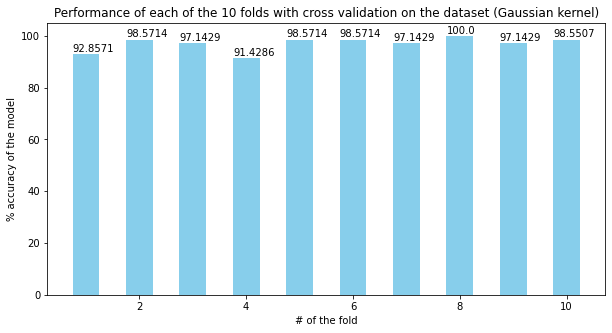

In [113]:
fig = plt.figure(figsize = (10, 5))
folds = range(1, 11)
print(gauss_scores)
scores = np.array(gauss_scores)
percentages = scores * 100
percentages = [round(num, 4) for num in percentages]
bars = plt.bar(folds, percentages, color='skyblue', width=0.5)
plt.xlabel("# of the fold")
plt.ylabel("% accuracy of the model")
plt.title("Performance of each of the 10 folds with cross validation on the dataset (Gaussian kernel)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 1, yval)
plt.show()

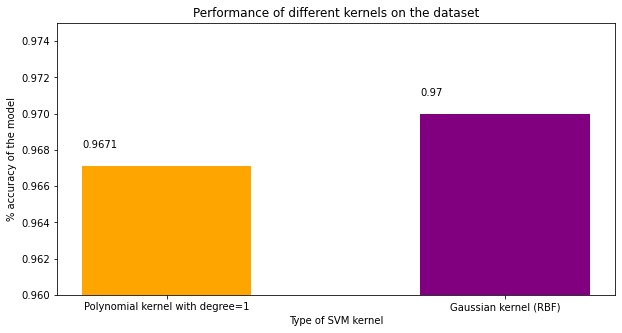

In [116]:
# comparing the two kernels
fig = plt.figure(figsize = (10, 5))
kernels = ["Polynomial kernel with degree=1", "Gaussian kernel (RBF)"]
accs = [0.9671, 0.9700]
bars = plt.bar(kernels, accs, color=['orange', 'purple'], width=0.5)
plt.xlabel("Type of SVM kernel")
plt.ylabel("% accuracy of the model")
plt.title("Performance of different kernels on the dataset")
plt.ylim(ymin=0.96)
plt.ylim(ymax=0.975)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [117]:
recall = cross_val_score(Gaussian_SVM, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(Gaussian_SVM, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(Gaussian_SVM, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(Gaussian_SVM, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9751666666666667
Precision: 0.9422838827838828
F1: 0.9578406816081587
Accuracy: 0.9699792960662525


### 6. deep neural network with Sigmoid activation functions

In [151]:
start = time.time()
from sklearn.neural_network import MLPClassifier

# MLP classifier defaults:
# default=100 number of neurons in the ith hidden layer
# Activation function for the hidden layer = ReLu
# The solver for weight optimization = "adam" (refers to a stochastic gradient-based optimizer proposed by 
# Kingma, Diederik, and Jimmy Ba)
# L2 penalty (regularization term) parameter alpha=0.0001
# hidden_layer_sizes

mlp = MLPClassifier(activation="logistic", max_iter=1000)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
#print each cv score (accuracy) and average them
print(mlp_scores)
print('Cross validation scores mean for NN with Sigmoid function classifier: {}'.format(np.mean(mlp_scores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.92857143 0.94285714 0.95714286 0.91428571 1.         0.97142857
 0.97142857 1.         0.98571429 1.        ]
Cross validation scores mean for NN with Sigmoid function classifier: 0.9671428571428571
Time elapsed:  7.157455921173096


In [152]:
recall = cross_val_score(mlp, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(mlp, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(mlp, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(mlp, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9501666666666665
Precision: 0.9505317460317461
F1: 0.952047553609335
Accuracy: 0.9657142857142859


In [124]:
mlp_layers = []
all_mlp_scores = []

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(1)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(2)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(100,100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(3)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(100,100,100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(4)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(100,100,100,100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(5)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

In [125]:
print("All NN scores for layers: ", all_mlp_scores)
print("# of layers: ", mlp_layers)

All NN scores for layers:  [0.9643, 0.9686, 0.9686, 0.9686, 0.9657]
# of layers:  [1, 2, 3, 4, 5]


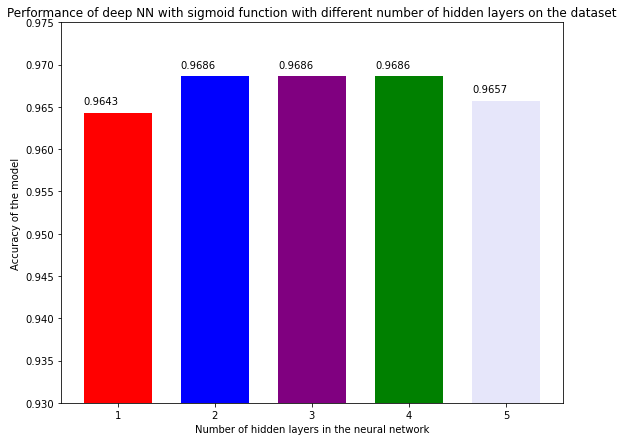

In [130]:
# all different layers
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(mlp_layers, all_mlp_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=0.7)
plt.xlabel("Number of hidden layers in the neural network")
plt.ylabel("Accuracy of the model")
plt.title("Performance of deep NN with sigmoid function with different number of hidden layers on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.975)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [131]:
mlp_units = []
unit_scores = []

for i in range(10, 110, 10):
    mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(i,))
    mlp_scores = cross_val_score(mlp, X, y, cv=10)
    mlp_units.append(i)
    unit_scores.append(round(np.mean(mlp_scores), 4))

In [132]:
print(mlp_units)
print(unit_scores)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.9686, 0.9629, 0.9643, 0.9643, 0.97, 0.9629, 0.9657, 0.9643, 0.9657, 0.9686]


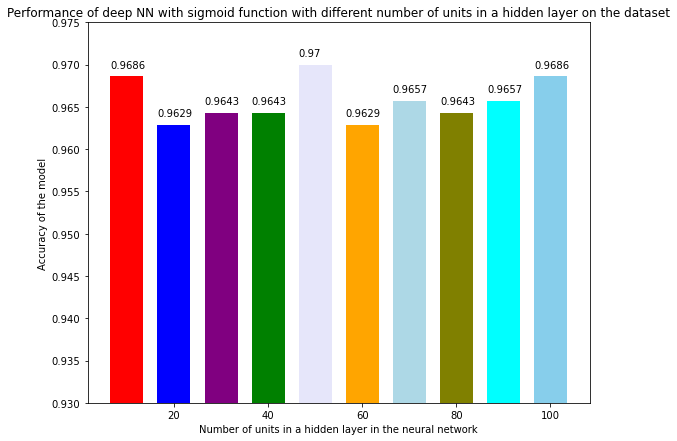

In [137]:
# all different units
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(mlp_units, unit_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=7)
plt.xlabel("Number of units in a hidden layer in the neural network")
plt.ylabel("Accuracy of the model")
plt.title("Performance of deep NN with sigmoid function with different number of units in a hidden layer on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.975)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [140]:
# weight solver
mlp_weights = ["lbfgs", "sgd", "adam"]
weight_scores = []

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), solver="lbfgs")
mlp_scores = cross_val_score(mlp, X, y, cv=10)
weight_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), solver="sgd")
mlp_scores = cross_val_score(mlp, X, y, cv=10)
weight_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), solver="adam")
mlp_scores = cross_val_score(mlp, X, y, cv=10)
weight_scores.append(round(np.mean(mlp_scores), 4))

In [141]:
print(weight_scores)

[0.927, 0.9571, 0.97]


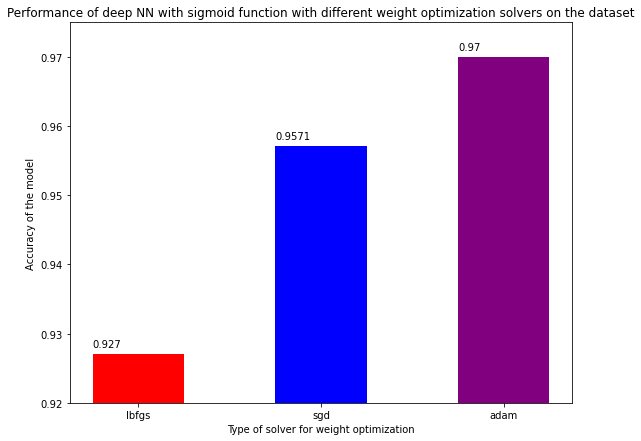

In [145]:
# all different units
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(mlp_weights, weight_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=0.5)
plt.xlabel("Type of solver for weight optimization")
plt.ylabel("Accuracy of the model")
plt.title("Performance of deep NN with sigmoid function with different weight optimization solvers on the dataset")
plt.ylim(ymin=0.92)
plt.ylim(ymax=0.975)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [146]:
# different alphas
alpha1 = 0.0001
alpha2 = 0.0005
alpha3 = 0.001
alpha4 = 0.005
alpha5 = 0.01

alphas = [alpha1, alpha2, alpha3, alpha4, alpha5]
alpha_scores = []

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), alpha=alpha1)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
alpha_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), alpha=alpha2)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
alpha_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), alpha=alpha3)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
alpha_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), alpha=alpha4)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
alpha_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), alpha=alpha5)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
alpha_scores.append(round(np.mean(mlp_scores), 4))

In [147]:
print(alpha_scores)

[0.9671, 0.9657, 0.9643, 0.9671, 0.9657]


In [148]:
# learning_rate_init
gamma1 = 0.001
gamma2 = 0.005
gamma3 = 0.01
gamma4 = 0.05
gamma5 = 0.1

gammas = [gamma1, gamma2, gamma3, gamma4, gamma5]
gamma_scores = []

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), learning_rate_init=gamma1)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
gamma_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), learning_rate_init=gamma2)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
gamma_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), learning_rate_init=gamma3)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
gamma_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), learning_rate_init=gamma4)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
gamma_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="logistic", max_iter=1000, hidden_layer_sizes=(50,), learning_rate_init=gamma5)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
gamma_scores.append(round(np.mean(mlp_scores), 4))

In [149]:
print(gamma_scores)

[0.9671, 0.96, 0.96, 0.96, 0.9486]


### Seventh (7th): ReLu activation

In [153]:
start = time.time()
from sklearn.neural_network import MLPClassifier

# MLP classifier defaults:
# default=100 number of neurons in the ith hidden layer
# Activation function for the hidden layer = ReLu
# The solver for weight optimization = "adam" (refers to a stochastic gradient-based optimizer proposed by 
# Kingma, Diederik, and Jimmy Ba)
# L2 penalty (regularization term) parameter alpha=0.0001
# hidden_layer_sizes

mlp = MLPClassifier(activation="relu", max_iter=1000)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
#print each cv score (accuracy) and average them
print(mlp_scores)
print('Cross validation scores mean for NN with ReLu function classifier: {}'.format(np.mean(mlp_scores)))
end = time.time()
print('Time elapsed: ', end - start)

[0.88571429 0.92857143 0.94285714 0.91428571 1.         0.98571429
 0.97142857 1.         1.         0.98550725]
Cross validation scores mean for NN with ReLu function classifier: 0.9614078674948242
Time elapsed:  8.22105598449707


In [154]:
recall = cross_val_score(mlp, X, y_binary, cv=10, scoring='recall')
print('Recall:', np.mean(recall))
precision = cross_val_score(mlp, X, y_binary, cv=10, scoring='precision')
print('Precision:', np.mean(precision))
f1 = cross_val_score(mlp, X, y_binary, cv=10, scoring='f1')
print('F1:', np.mean(f1))
accuracy = cross_val_score(mlp, X, y_binary, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(accuracy))

Recall: 0.9418333333333335
Precision: 0.9512738927738928
F1: 0.9404955826737906
Accuracy: 0.9614078674948242


In [155]:
mlp_layers = []
all_mlp_scores = []

mlp = MLPClassifier(activation="relu", max_iter=1000, hidden_layer_sizes=(100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(1)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="relu", max_iter=1000, hidden_layer_sizes=(100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(2)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="relu", max_iter=1000, hidden_layer_sizes=(100,100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(3)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="relu", max_iter=1000, hidden_layer_sizes=(100,100,100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(4)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="relu", max_iter=1000, hidden_layer_sizes=(100,100,100,100,100,))
mlp_scores = cross_val_score(mlp, X, y, cv=10)
mlp_layers.append(5)
all_mlp_scores.append(round(np.mean(mlp_scores), 4))

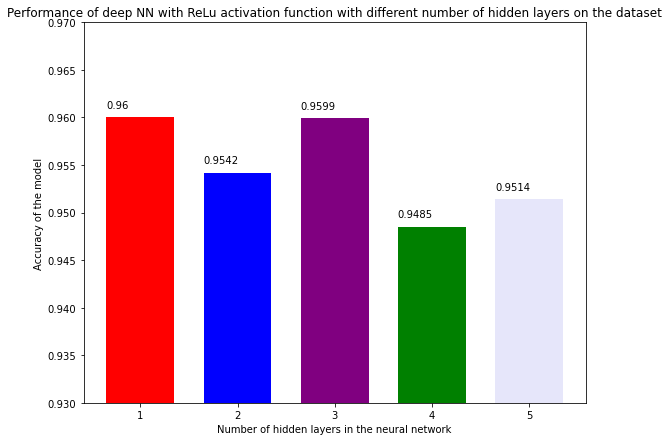

In [161]:
# all different layers
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(mlp_layers, all_mlp_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=0.7)
plt.xlabel("Number of hidden layers in the neural network")
plt.ylabel("Accuracy of the model")
plt.title("Performance of deep NN with ReLu activation function with different number of hidden layers on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.97)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [157]:
mlp_units = []
unit_scores = []

for i in range(10, 110, 10):
    mlp = MLPClassifier(activation="relu", max_iter=1000, hidden_layer_sizes=(i,))
    mlp_scores = cross_val_score(mlp, X, y, cv=10)
    mlp_units.append(i)
    unit_scores.append(round(np.mean(mlp_scores), 4))

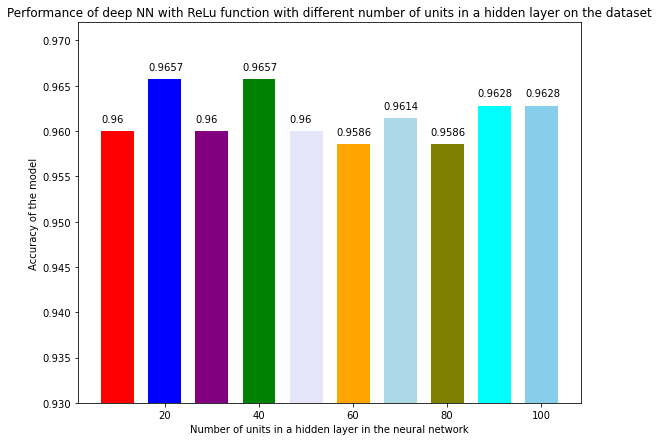

In [163]:
# all different units
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(mlp_units, unit_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=7)
plt.xlabel("Number of units in a hidden layer in the neural network")
plt.ylabel("Accuracy of the model")
plt.title("Performance of deep NN with ReLu function with different number of units in a hidden layer on the dataset")
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.972)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

In [159]:
# weight solver
mlp_weights = ["lbfgs", "sgd", "adam"]
weight_scores = []

mlp = MLPClassifier(activation="relu", max_iter=1500, hidden_layer_sizes=(50,), solver="lbfgs")
mlp_scores = cross_val_score(mlp, X, y, cv=10)
weight_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="relu", max_iter=1500, hidden_layer_sizes=(50,), solver="sgd")
mlp_scores = cross_val_score(mlp, X, y, cv=10)
weight_scores.append(round(np.mean(mlp_scores), 4))

mlp = MLPClassifier(activation="relu", max_iter=1500, hidden_layer_sizes=(50,), solver="adam")
mlp_scores = cross_val_score(mlp, X, y, cv=10)
weight_scores.append(round(np.mean(mlp_scores), 4))

/Users/nurzhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


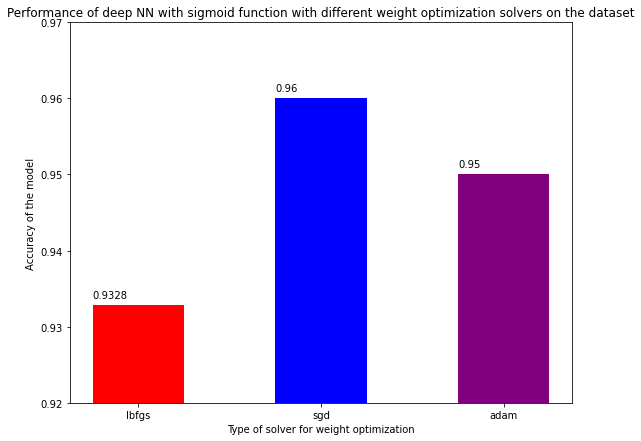

In [164]:
# all different units
fig = plt.figure(figsize = (9, 7))
bars4 = plt.bar(mlp_weights, weight_scores, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "skyblue"], width=0.5)
plt.xlabel("Type of solver for weight optimization")
plt.ylabel("Accuracy of the model")
plt.title("Performance of deep NN with sigmoid function with different weight optimization solvers on the dataset")
plt.ylim(ymin=0.92)
plt.ylim(ymax=0.97)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()

### FINAL COMPARISON

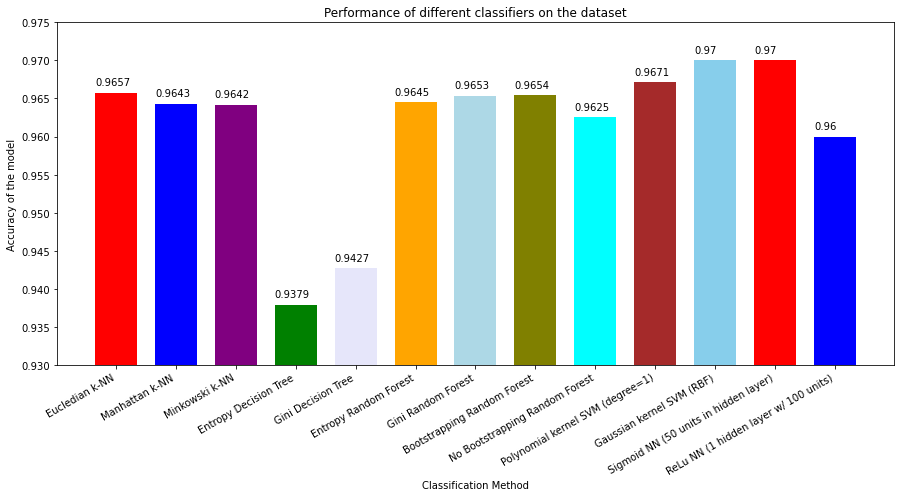

In [166]:
# combining all so far
allSoFar = np.array([0.9657, 0.9643, 0.9642, 0.9379, 0.9427, 0.9645, 0.9653, 0.9654, 0.9625, 0.9671, 0.97, 0.97, 0.96])
fig = plt.figure(figsize = (15, 7))
measures = ["Eucledian k-NN", "Manhattan k-NN", "Minkowski k-NN", "Entropy Decision Tree", "Gini Decision Tree", \
               "Entropy Random Forest", "Gini Random Forest", "Bootstrapping Random Forest", \
               "No Bootstrapping Random Forest", "Polynomial kernel SVM (degree=1)", "Gaussian kernel SVM (RBF)", \
               "Sigmoid NN (50 units in hidden layer)", "ReLu NN (1 hidden layer w/ 100 units)"]
bars4 = plt.bar(measures, allSoFar, color=['red', 'blue', 'purple', 'green', 'lavender', "orange", "lightblue", "olive", "cyan", "brown", "skyblue"], width=0.7)
plt.xlabel("Classification Method")
plt.ylabel("Accuracy of the model")
plt.title("Performance of different classifiers on the dataset")
fig.autofmt_xdate()
plt.ylim(ymin=0.93)
plt.ylim(ymax=0.975)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.001, yval)
plt.show()